In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv (r"C:\Users\sarwi\OneDrive\Desktop\ml projects\churn data\churn_dataset.csv")

df.shape

(7043, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# data type conversion
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df=df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

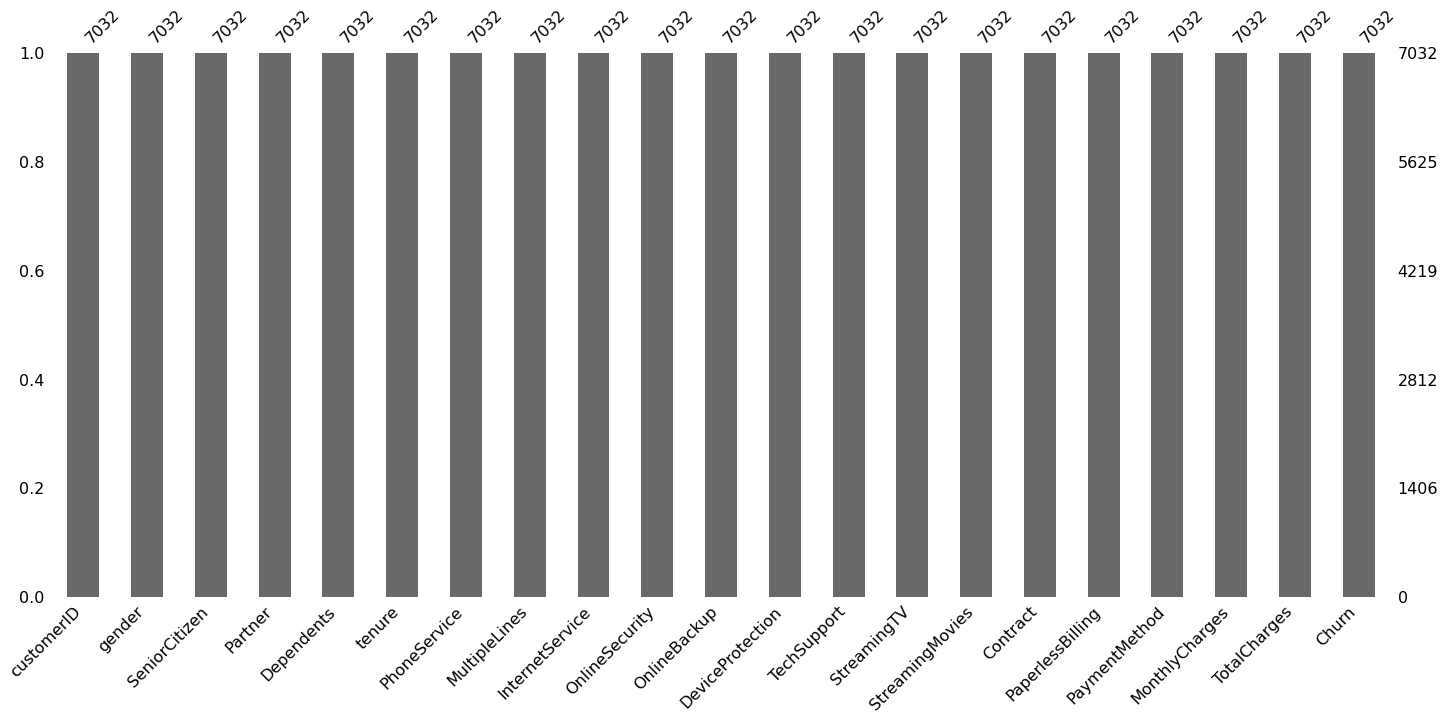

In [11]:
msno.bar(df)

Text(0.5, 1.0, 'Heatmap of missing values')

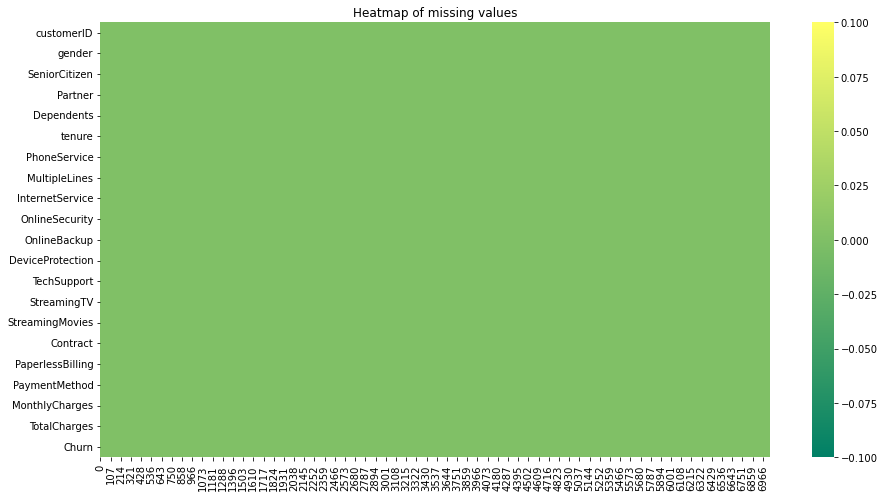

In [30]:
# Heatmap of missing values
plt.figure(figsize=(15,8))
sns.heatmap(df.isna().T, cmap='summer')
plt.title('Heatmap of missing values')

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# target feature count
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [15]:
df["Churn"].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

Text(0.5, 1.0, 'target variable')

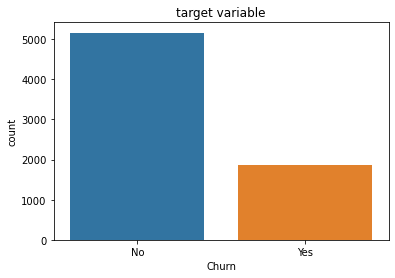

In [20]:
sns.countplot(df.Churn)
plt.title("target variable")

([<matplotlib.patches.Wedge at 0x2dbc1d4ac70>,
 [Text(-0.7383051242403968, 0.8154174044747711, 'No'),
  Text(0.7383051242403964, -0.8154174044747714, 'Yes')],
 [Text(-0.40271188594930735, 0.44477312971351146, '73%'),
  Text(0.40271188594930707, -0.44477312971351163, '27%')])

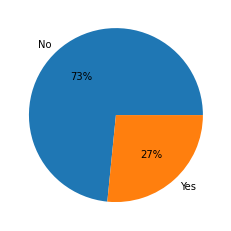

In [21]:
values=df['Churn'].value_counts()
labels=df['Churn'].unique().tolist()

plt.pie(df['Churn'].value_counts(),autopct='%.0f%%',labels=labels)

#### The plot for the target variable shows  imbalance in the target variable.

# Exploratory Data Analysis

In [40]:
cat_var= df.select_dtypes(include= ["object"])
cat_var

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [41]:
import requests
from io import BytesIO

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


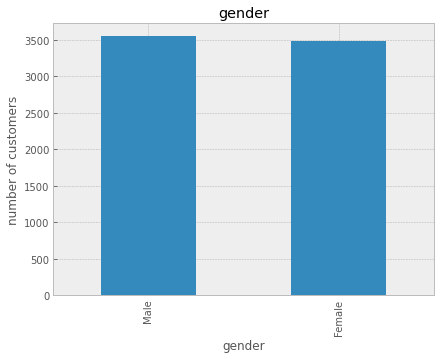

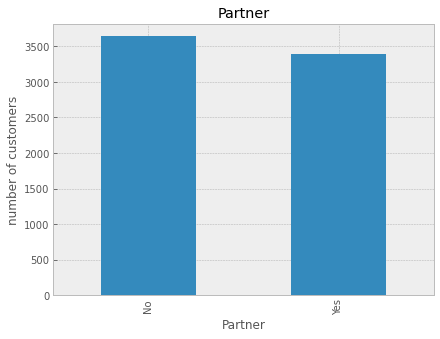

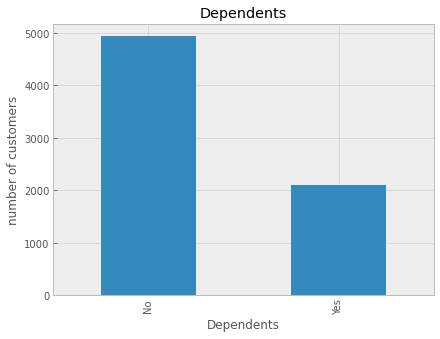

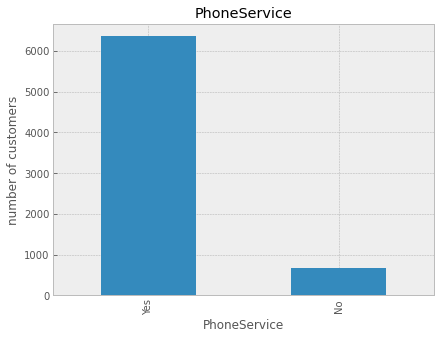

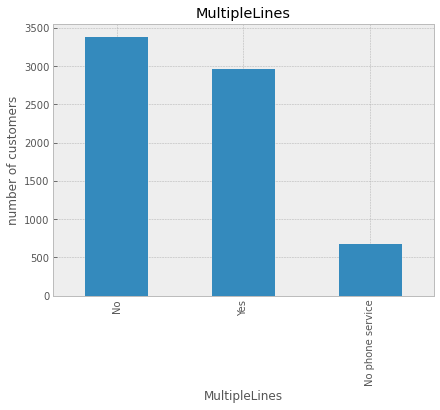

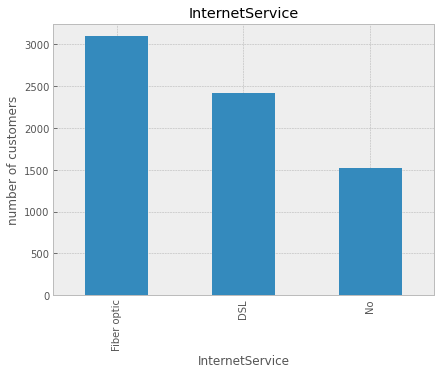

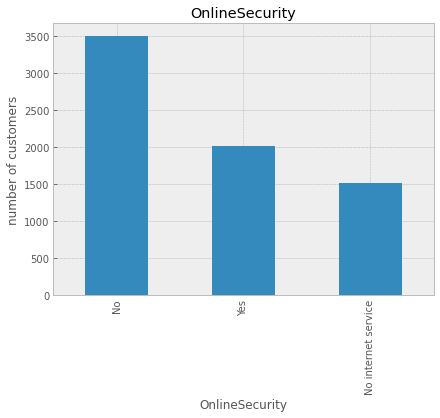

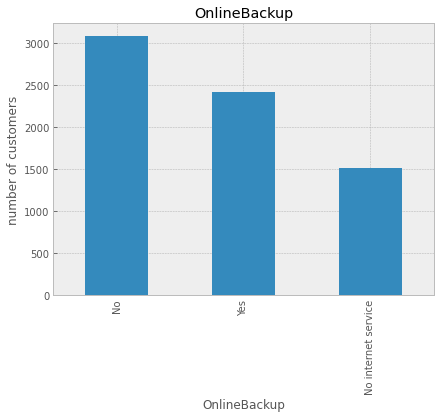

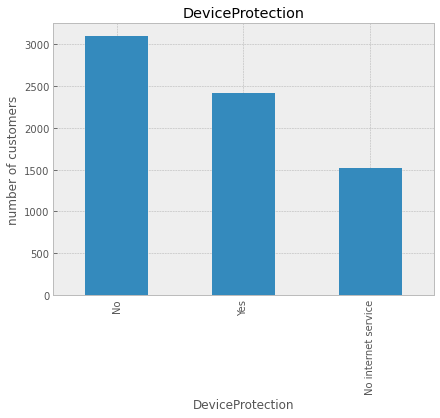

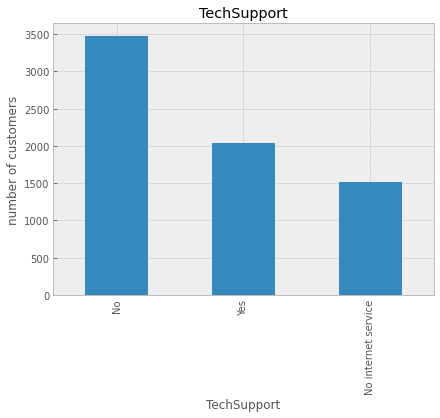

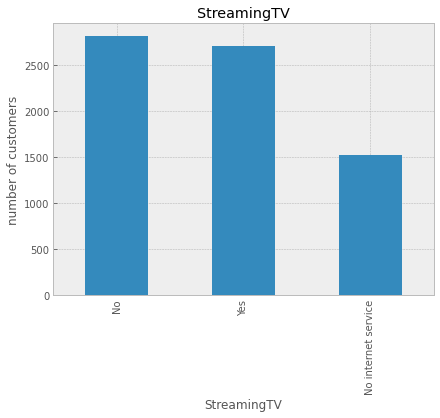

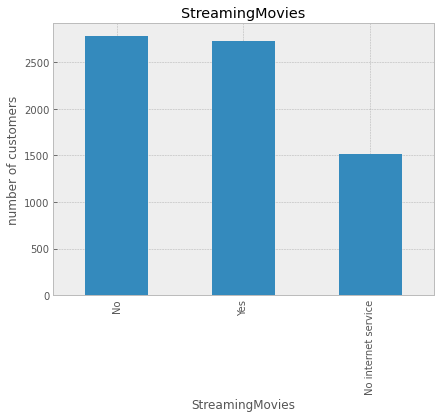

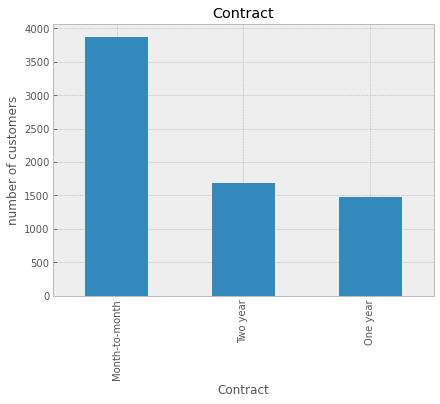

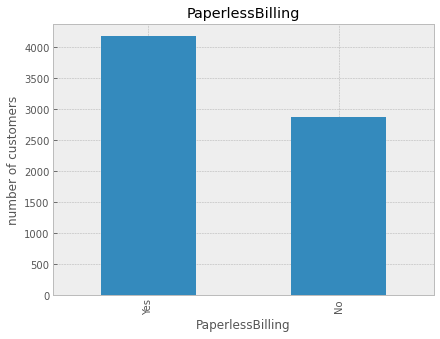

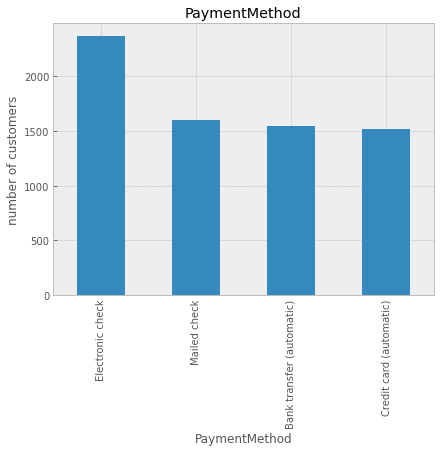

In [65]:
# indentifying the categorical variables
cat_var1= df.select_dtypes(include= ["object"]).columns
print(cat_var1)

# plotting bar chart for each categorical variable
plt.style.use("bmh")

for column in cat_var1:
    if column =='customerID':
        continue
    elif column == 'Churn':
        continue
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    df[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)
   

### Observations

● It seems like mostlty both the male and female are using communications , that too customers who are not having any partner are High.

● Independent people has highest Phone Services and also No using Multiple lines.

● The highest Internet Servieces are Fiber Optic with out any Online Security , Online Backup ,Device Protection and Tech Support.And also for not Sreaming services..

● Majortiy of customers have Month-to-Month Contract,They are using PaperLess Billing.

● Most of the Payment methods are Electronic

In [58]:
# indentifying the numerical variables

num_var= df.select_dtypes(include=np.number)
num_var.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


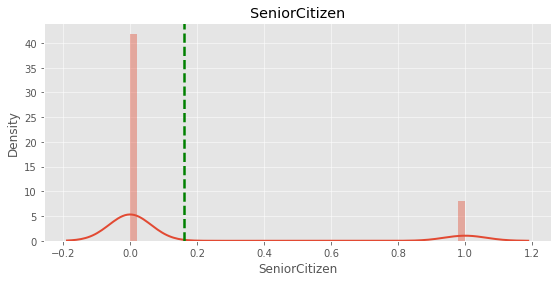

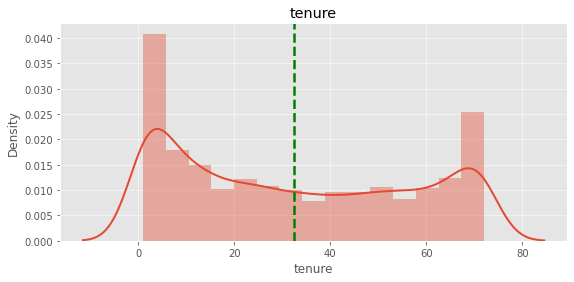

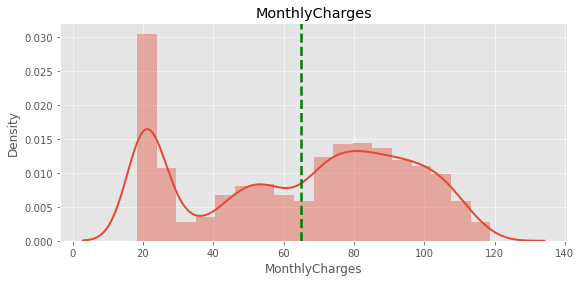

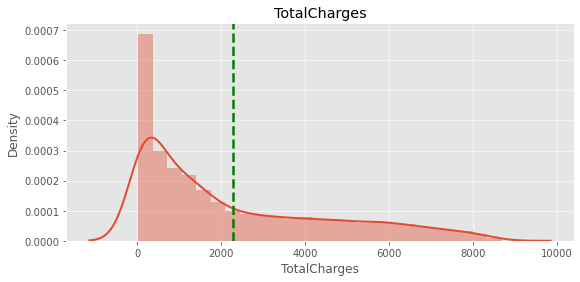

In [62]:
# plotting histogram for each numerical variable
plt.style.use("ggplot")
for column in num_var:
    if column == 'loan_status':
        continue
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df[column], kde=True)
    plt.axvline(x=df[column].mean(),
            color='green',ls='--', 
            lw=2.5)
    plt.title(column)

In [66]:
print("kurtosis of Numerical variables:",'\n')
print(num_var.kurtosis(),'\n\n')
print('Skewness of Numerical variables :','\n')
print(num_var.skew(),'\n\n')
print('Mean for Numerical variables:','\n')
print(num_var.mean(),'\n\n')

kurtosis of Numerical variables: 

SeniorCitizen     1.353321
tenure           -1.387823
MonthlyCharges   -1.256156
TotalCharges     -0.231799
dtype: float64 


Skewness of Numerical variables : 

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64 


Mean for Numerical variables: 

SeniorCitizen        0.162400
tenure              32.421786
MonthlyCharges      64.798208
TotalCharges      2283.300441
dtype: float64 




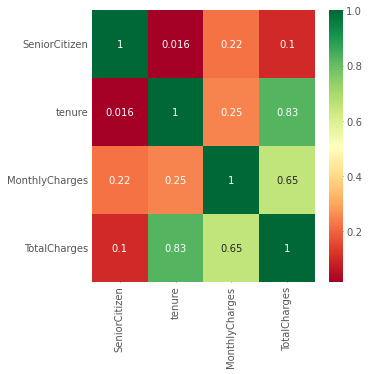

In [67]:
corrmat = num_var.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(num_var[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Observation :
● AS we can observe that there is no high skewness in the features , we can say  there is no presence of outliers in.

● AS we already no that if the Monthly charges are more automatically Total charges are also high.

●Tenure and Total charges are highly correlated each other..

● Customers who are paying highest Monthly charges are Senior citizens .

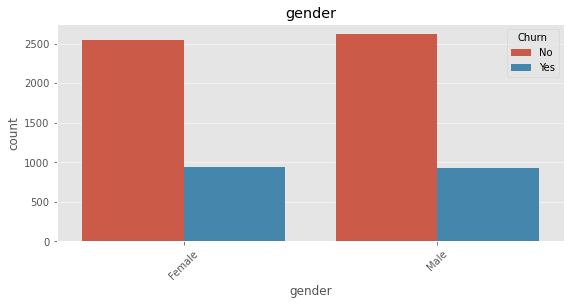

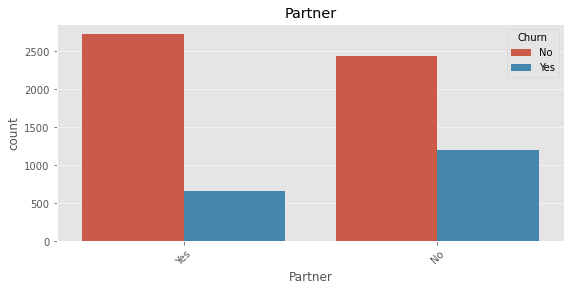

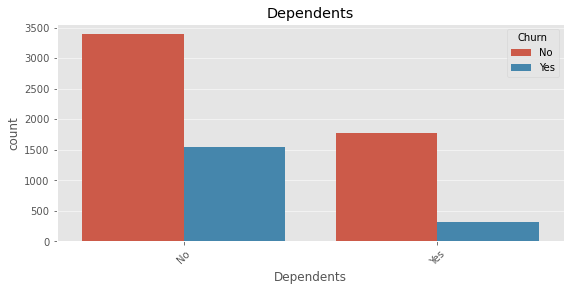

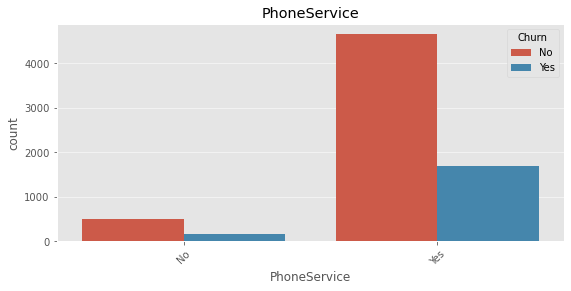

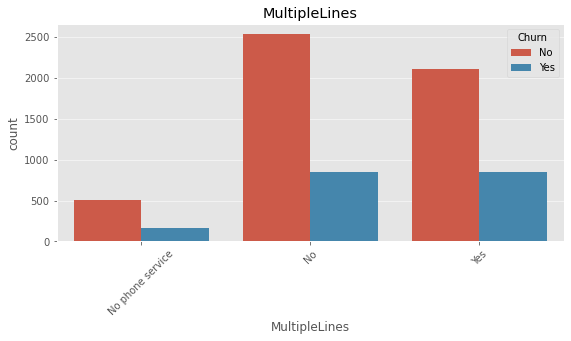

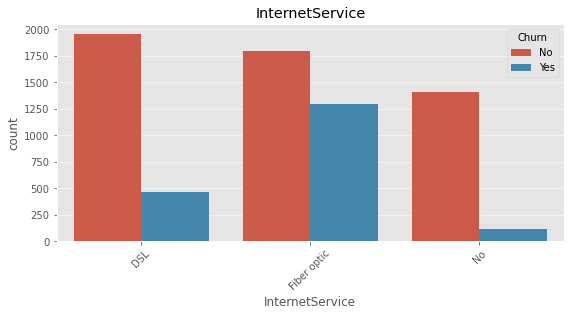

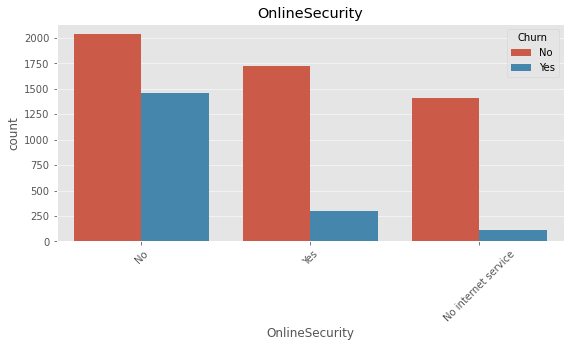

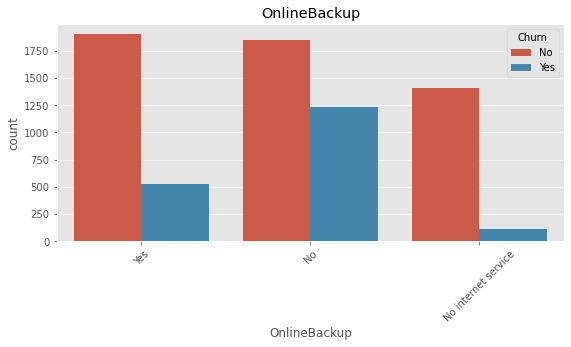

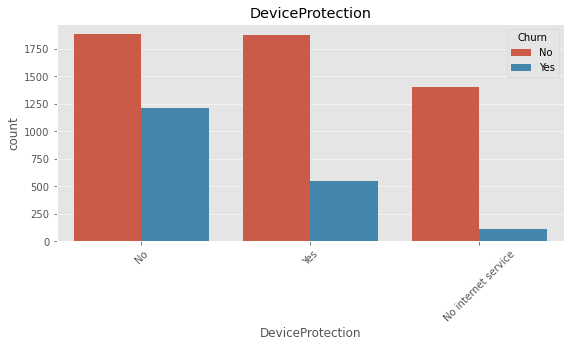

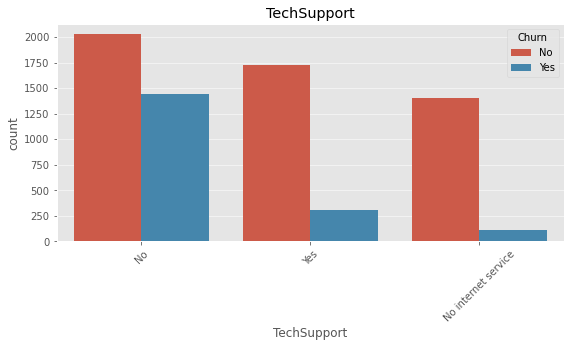

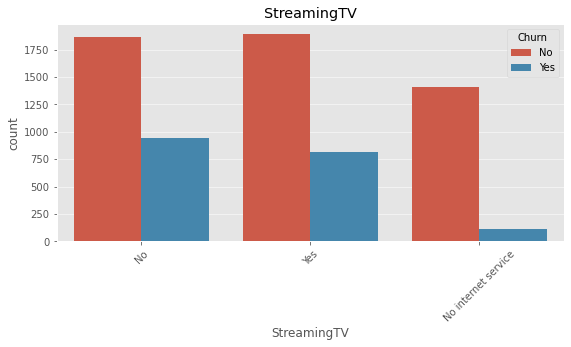

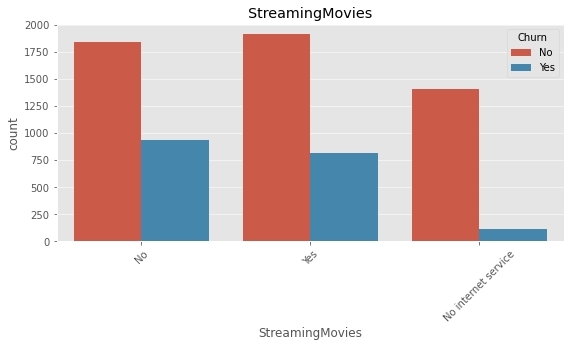

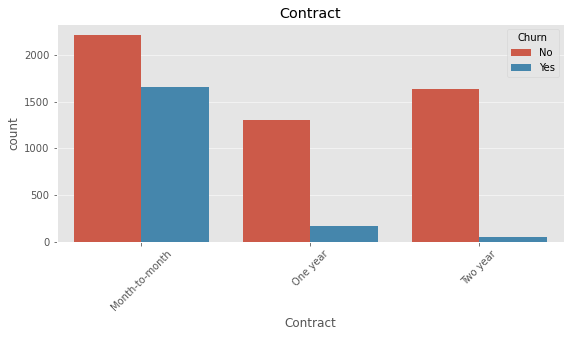

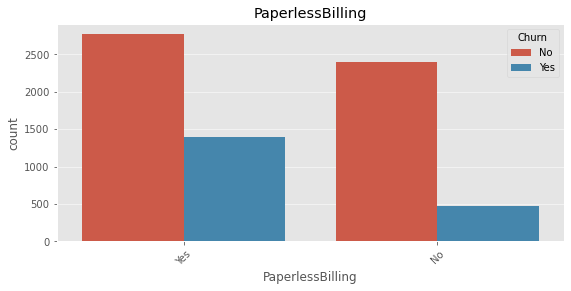

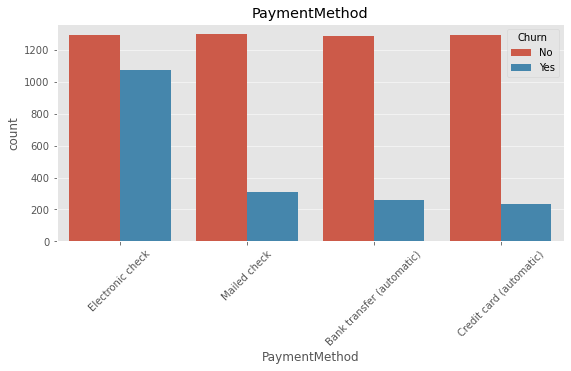

In [68]:
plt.style.use("ggplot")
for column in cat_var1:
    if column =='customerID':
        continue
    elif column == 'Churn':
        continue
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df[column], hue=df["Churn"])
    plt.title(column)    
    plt.xticks(rotation=45)

# Model Building

Identifying the Target Variable and Splitting the Data into Train and Test

In [72]:
y = df['Churn']

X = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [73]:
import sklearn

print(sklearn.__version__)

1.1.1


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [75]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
879,Male,0,No,No,33,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.65,1665.20
5790,Female,0,Yes,Yes,40,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55
6498,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.30
880,Male,0,No,No,10,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.10,1043.30
2784,Female,0,No,Yes,4,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,396.30


In [76]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(4922, 19) (4922,)
(2110, 19) (2110,)


In [77]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
879,Male,0,No,No,33,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.65,1665.20
5790,Female,0,Yes,Yes,40,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.85,2036.55
6498,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.30
880,Male,0,No,No,10,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,110.10,1043.30
2784,Female,0,No,Yes,4,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,396.30


# Separating Categorical and Numerical Columns:

In [79]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
879,Male,No,No,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic)
5790,Female,Yes,Yes,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
6498,Female,No,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check
880,Male,No,No,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
2784,Female,No,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic)


In [80]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
879,0,33,54.65,1665.20
5790,0,40,50.85,2036.55
6498,0,1,82.30,82.30
880,0,10,110.10,1043.30
2784,0,4,98.10,396.30


In [81]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
942,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
3730,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
1761,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic)
2283,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1872,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)


In [82]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,0,24,79.85,2001.00
3730,0,57,104.50,5921.35
1761,0,58,24.45,1513.60
2283,0,1,71.55,71.55
1872,0,41,19.70,804.25


# Scaling the Numerical Features

In [84]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
879,-0.439559,0.019693,-0.338074,-0.276449
5790,-0.439559,0.305384,-0.464443,-0.112702
6498,-0.439559,-1.286319,0.581425,-0.974430
880,-0.439559,-0.919003,1.505913,-0.550676
2784,-0.439559,-1.163880,1.106854,-0.835971


# Applying OneHotEncoding on Categorical Columns


In [85]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
879,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5790,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6498,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
880,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2784,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [86]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_ohe], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
879,-0.439559,0.019693,-0.338074,-0.276449,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5790,-0.439559,0.305384,-0.464443,-0.112702,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6498,-0.439559,-1.286319,0.581425,-0.974430,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
880,-0.439559,-0.919003,1.505913,-0.550676,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2784,-0.439559,-1.163880,1.106854,-0.835971,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [87]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
942,-0.442117,-0.332755,0.501209,-0.115603
3730,-0.442117,1.006613,1.319754,1.616282
1761,-0.442117,1.047200,-1.338442,-0.330920
2283,-0.442117,-1.266254,0.225593,-0.967971
1872,-0.442117,0.357223,-1.496174,-0.644288


In [88]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3730,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1761,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2283,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1872,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
942,-0.442117,-0.332755,0.501209,-0.115603,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3730,-0.442117,1.006613,1.319754,1.616282,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1761,-0.442117,1.047200,-1.338442,-0.330920,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2283,-0.442117,-1.266254,0.225593,-0.967971,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1872,-0.442117,0.357223,-1.496174,-0.644288,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# LogisticRegression

In [90]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X_train_transformed, y_train)

LogisticRegression()

In [91]:
from sklearn.metrics import accuracy_score
y_test_pred = classifier1.predict(X_test_transformed)

In [92]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [93]:
print(accuracy_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred,normalize=False))


0.7981042654028436
1684


# KNeighborsClassifier

In [95]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [96]:
y_test_pred = classifier.predict(X_test_transformed)

In [97]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No


In [98]:
print(accuracy_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred,normalize=False))


0.752132701421801
1587


# DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [100]:
y_test_pred = regressor.predict(X_test_transformed)

In [101]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,Yes
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [102]:
print(accuracy_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred,normalize=False))


0.709478672985782
1497


# RandomForestClassifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
regressor1 = RandomForestClassifier()
regressor1.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [105]:
y_test_pred = regressor1.predict(X_test_transformed)

In [106]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,No
1872,No,No


In [107]:
print(accuracy_score(y_test,y_test_pred))
print(accuracy_score(y_test,y_test_pred,normalize=False))


0.7786729857819905
1643


In [108]:
from sklearn.svm import SVC
Support_vector_machine = SVC() 
Support_vector_machine.fit(X_train_transformed, y_train)

SVC()

In [109]:
y_test_pred = Support_vector_machine.predict(X_test_transformed)

In [110]:
temp_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df2.head()

,Actual,Predicted
942,No,No
3730,Yes,No
1761,No,No
2283,Yes,Yes
1872,No,No


In [111]:
print(accuracy_score(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred, normalize=False))

0.790521327014218
1668


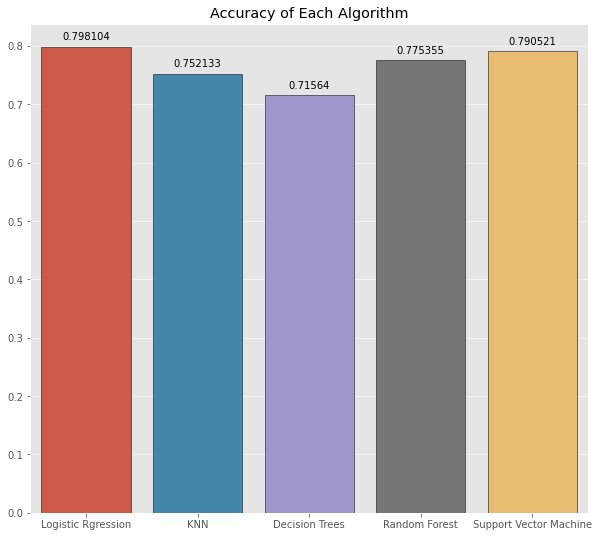

In [112]:
Algorithm=["Logistic Rgression","KNN","Decision Trees","Random Forest","Support Vector Machine",]
Accuracy=[0.7981042654028436,0.752132701421801,0.7156398104265402,0.7753554502369668,0.790521327014218]
plt.figure(figsize=(10,9))
ax = sns.barplot(x =Algorithm  , y = Accuracy,edgecolor="black");

for i in ax.containers:
    ax.bar_label(i,padding=5)
    ax
plt.title('Accuracy of Each Algorithm',);    
plt.show()


# **Conclusion**

### After applying Different Algorithms To predict the Churn Data 
### Most accurated Algorithm for this Churn data is LogisticRegression with the accuracy of 0.7981042654028436
### And second Most accurates Algorithm  is Support Vector Machine With the accuracy of  0.790521327014218